In [9]:
import cv2
import cv
import numpy as np
import os
import glob
import shutil
import random
from random import shuffle
from tqdm import tqdm
from PIL import Image

import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression

import tensorflow as tf
tf.reset_default_graph()

import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update(plt.rcParamsDefault)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

IMG_SIZE = 50
LR = 1e-3

MODEL_NAME = 'dogsvscats--{}--{}.model'.format(LR,'6conv')

In [2]:
# Directories to define for this model to work
CAT_DIR = 'C:\\Users\\abdul\\6910 Python ML files\\Project Files\\Neural Network Project\\Cat vs Dog Dataset\\Cat'
DOG_DIR = 'C:\\Users\\abdul\\6910 Python ML files\\Project Files\\Neural Network Project\\Cat vs Dog Dataset\\Dog'
NEW_CAT_DIR = 'C:\\Users\\abdul\\6910 Python ML files\\Project Files\\Neural Network Project\\Cat vs Dog Dataset\\NEW_Cat'
NEW_DOG_DIR = 'C:\\Users\\abdul\\6910 Python ML files\\Project Files\\Neural Network Project\\Cat vs Dog Dataset\\NEW_Dog'
TRAIN_DIR = r'C:\Users\abdul\6910 Python ML files\Project Files\Neural Network Project\Cat vs Dog Dataset\train'
TEST_DIR = r'C:\Users\abdul\6910 Python ML files\Project Files\Neural Network Project\Cat vs Dog Dataset\test' 


In [ ]:
# Creating test and train directories for cats vs dogs dataset
i = 0
os.mkdir(NEW_CAT_DIR)
os.mkdir(NEW_DOG_DIR)
os.mkdir(TEST_DIR)
os.mkdir(TRAIN_DIR)



for img in os.listdir(CAT_DIR):
    shutil.copy(os.path.join(CAT_DIR, img), NEW_CAT_DIR)
    
for img in os.listdir(DOG_DIR):
    shutil.copy(os.path.join(DOG_DIR, img), NEW_DOG_DIR)
    

i = 0
for img in os.listdir(NEW_CAT_DIR):
    os.rename(os.path.join(NEW_CAT_DIR,img), os.path.join(NEW_CAT_DIR,'cat.' + str(i)+ '.jpg'))
    i = i+1

i = 0
for img in os.listdir(NEW_DOG_DIR):
    os.rename(os.path.join(NEW_DOG_DIR,img), os.path.join(NEW_DOG_DIR, 'dog.' + str(i) + '.jpg'))
    i = i+1

for img in os.listdir(NEW_CAT_DIR)[:1000]:
    shutil.copy(os.path.join(NEW_CAT_DIR,img), TRAIN_DIR)
    
for img in os.listdir(NEW_DOG_DIR)[:1000]:
    shutil.copy(os.path.join(NEW_DOG_DIR,img), TRAIN_DIR)
    
for img in os.listdir(NEW_CAT_DIR)[1000:1500]:
    shutil.copy(os.path.join(NEW_CAT_DIR,img), TEST_DIR)
    
for img in os.listdir(NEW_DOG_DIR)[1000:1500]:
    shutil.copy(os.path.join(NEW_DOG_DIR,img), TEST_DIR)
    
    
random_num = random.sample(range(len(os.listdir(TEST_DIR))),len(os.listdir(TEST_DIR)))
i = 0
for img in os.listdir(TEST_DIR):
    os.rename(os.path.join(TEST_DIR, img), os.path.join(TEST_DIR, str(random_num[i]) + '.jpg'))
    i = i+1



In [3]:
def label_img(img):
    #cat.0.jpg
    word_label = img.split('.')[-3]
    if word_label == 'cat':return [1,0]
    elif word_label == 'dog':return[0,1]
    

In [4]:
def create_train_data():
    training_data = []
    for img in tqdm(os.listdir(TRAIN_DIR)):
        label = label_img(img)
        path = os.path.join(TRAIN_DIR, img)
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            training_data.append([np.array(img), np.array(label)])
    shuffle(training_data)
    np.save('train_data.npy', training_data)
    return training_data


In [5]:
def process_test_data():
    testing_data = []
    for img in tqdm(os.listdir(TEST_DIR)):
        path = os.path.join(TEST_DIR, img)
        img_num = img.split('.')[0]
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(cv2.imread(path,cv2.IMREAD_GRAYSCALE), (IMG_SIZE, IMG_SIZE))
            testing_data.append([np.array(img), img_num])
    
    np.save('test_data.npy', testing_data)
    return testing_data

In [6]:
print("Total number of images that we have")
len(os.listdir(CAT_DIR)) + len(os.listdir(DOG_DIR))
print("Total number of Training Images")
len(os.listdir(TRAIN_DIR))
print("Total number of Testing Images")
len(os.listdir(TEST_DIR))

Total number of images that we have


3000

Total number of Training Images


2000

Total number of Testing Images


1000

Text(0.5, 1.0, 'Cat')

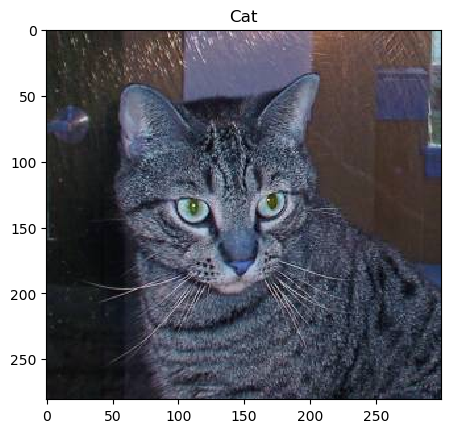

In [10]:
# Cat set
img = os.listdir(CAT_DIR)[1]
sample_img = cv2.imread(os.path.join(CAT_DIR,img))
plt.imshow(sample_img)
plt.title('Cat')

Text(0.5, 1.0, 'Dog')

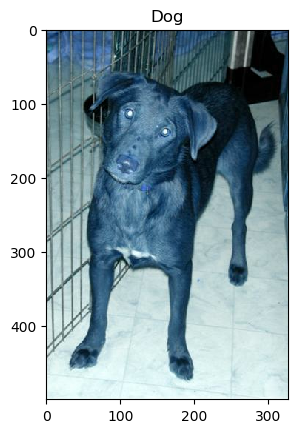

In [11]:
# Dog set
img = os.listdir(DOG_DIR)[1]
sample_img = cv2.imread(os.path.join(DOG_DIR,img))
plt.imshow(sample_img)
plt.title('Dog')

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Cat')

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Dog')

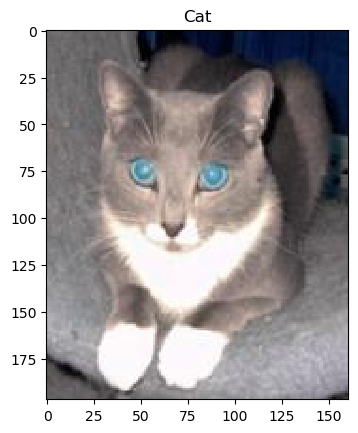

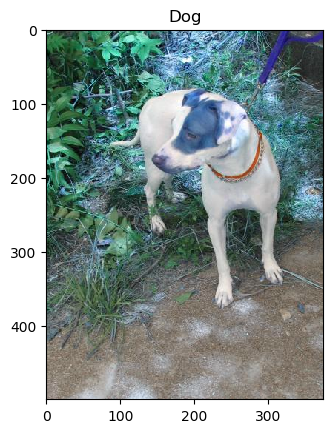

In [12]:
#Trainig set

img = os.listdir(TRAIN_DIR)[4]
sample_img = cv2.imread(os.path.join(TRAIN_DIR,img))
plt.figure()
plt.imshow(sample_img)
plt.title('Cat')

img = os.listdir(TRAIN_DIR)[1500]
sample_img = cv2.imread(os.path.join(TRAIN_DIR,img))
plt.figure()
plt.imshow(sample_img)
plt.title('Dog')

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Cat')

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Dog')

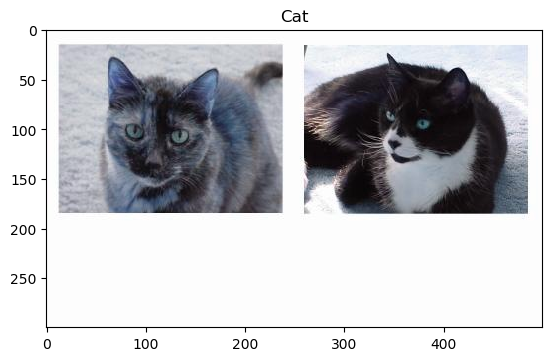

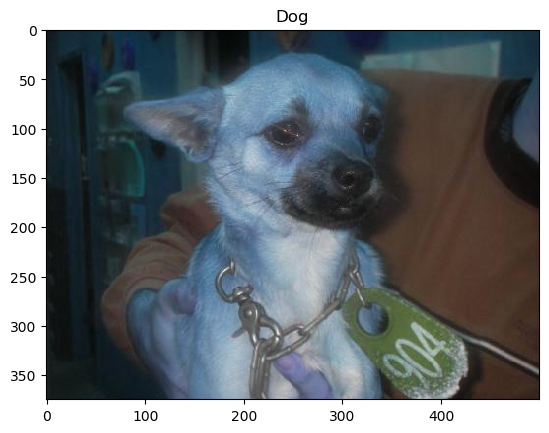

In [13]:
#Testing set
img = os.listdir(TEST_DIR)[1]
sample_img = cv2.imread(os.path.join(TEST_DIR,img))
plt.figure()
plt.imshow(sample_img)
plt.title('Cat')

img = os.listdir(TEST_DIR)[500]
sample_img = cv2.imread(os.path.join(TEST_DIR,img))
plt.figure()
plt.imshow(sample_img)
plt.title('Dog')

In [14]:
train_data = create_train_data()

100%|████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1037.50it/s]


In [15]:
# Creating the convolution network model using tesnorflow

convnet = input_data(shape = [None, IMG_SIZE, IMG_SIZE, 1], name = 'input')

convnet = conv_2d(convnet, 32, 2, activation = 'relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation = 'relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 32, 2, activation = 'relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation = 'relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 32, 2, activation = 'relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation = 'relu')
convnet = max_pool_2d(convnet, 2)

convnet = fully_connected(convnet, 1024, activation = 'relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation = 'softmax')
convnet = regression(convnet, optimizer='adam', learning_rate = LR, loss = 'categorical_crossentropy', name = 'targets')

# model = tflearn.DNN(convnet, tensorboard_dir = 'log')
model = tflearn.DNN(convnet, tensorboard_dir = 'logs', tensorboard_verbose = 3)



Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Use tf.cast instead.


In [16]:
train = train_data[:-40]
test = train_data[-40:]

In [17]:
X = np.array([i[0] for i in train]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
Y = [i[1] for i in train]

test_x = np.array([i[0] for i in test]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
test_y = [i[1] for i in test]

In [22]:
model.fit({'input': X},
          {'targets': Y},
          n_epoch=30,
          validation_set=({'input': test_x},
                          {'targets': test_y}),
#           snapshot_step = 40,
          show_metric=True,
          run_id=MODEL_NAME)

Training Step: 929  | total loss: 0.15474 | time: 7.030s
| Adam | epoch: 030 | loss: 0.15474 - acc: 0.9375 -- iter: 1920/1954
Training Step: 930  | total loss: 0.14319 | time: 8.274s
| Adam | epoch: 030 | loss: 0.14319 - acc: 0.9422 | val_loss: 1.77729 - val_acc: 0.6000 -- iter: 1954/1954
--


In [20]:
model.save(MODEL_NAME)

INFO:tensorflow:C:\Users\abdul\6910 Python ML files\Project Files\Neural Network Project\dogsvscats--0.001--6conv.model is not in all_model_checkpoint_paths. Manually adding it.


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 458.60it/s]


Text(0.5, 1.0, 'Dog')

Text(0.5, 1.0, 'Dog')

Text(0.5, 1.0, 'Dog')

Text(0.5, 1.0, 'Cat')

Text(0.5, 1.0, 'Dog')

Text(0.5, 1.0, 'Cat')

Text(0.5, 1.0, 'Dog')

Text(0.5, 1.0, 'Cat')

Text(0.5, 1.0, 'Cat')

Text(0.5, 1.0, 'Cat')

Text(0.5, 1.0, 'Cat')

Text(0.5, 1.0, 'Cat')

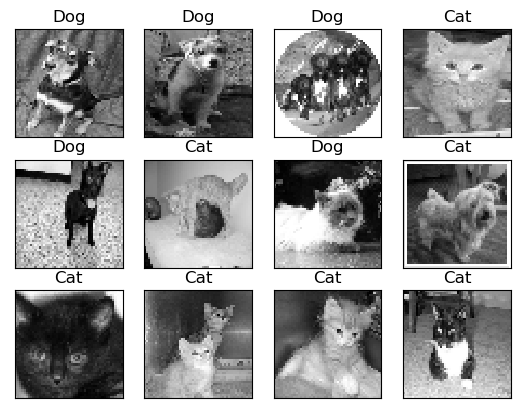

In [24]:
test_data = process_test_data()

fig = plt.figure()
test = random.sample(test_data, 12)

for num, data in enumerate(test):
    #cat:[1,0]
    #dog[0,1]
    
    img_num = data[1]
    img_data = data[0]
    
    y = fig.add_subplot(3,4,num+1)
    orig = img_data
    data = img_data.reshape(IMG_SIZE, IMG_SIZE, 1)
    
    model_out = model.predict([data])[0]
    
    if np.argmax(model_out) == 1: str_label = 'Dog'
    else: str_label = 'Cat'
        
    y.imshow(orig, cmap = 'gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()